# EE 399
### Ting Jones
### 4/24/23
### HW 3

## Part 1

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from numpy import linalg 
from sklearn.datasets import fetch_openml

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
## Problem A
# Load the MNIST data
mnist = fetch_openml('mnist_784', parser="auto")
y = mnist.target
X = mnist.data / 255.0  # Scale the data to [0, 1]

# changing format of MNIST dataset so that each image is a column vector
X = X.to_numpy().T
print(X.shape)

(784, 70000)


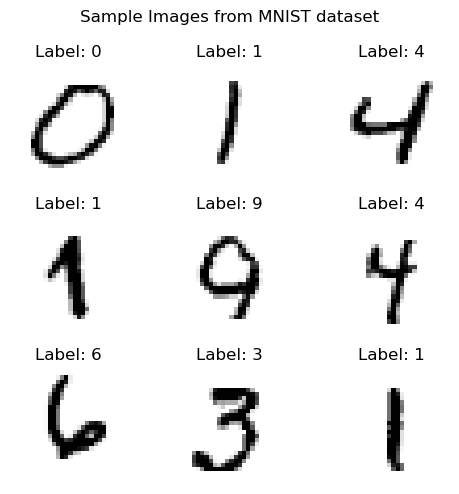

In [3]:
import random
# view random sample images in grayscale
fig = plt.figure(figsize=(5,5))
for i in range(9):
    ax = fig.add_subplot(3, 3, i+1)
    image_sel = random.randrange(0, X.shape[1])
    ax.imshow(X[:, image_sel].reshape(28, 28), cmap="binary")
    plt.title("Label: " + str(y[image_sel]))
    plt.axis('off')
plt.suptitle("Sample Images from MNIST dataset")
plt.tight_layout()

### Problem 1

In [4]:
rand_num = random.sample(range(X.shape[1]), 4000)
sample_x = X[:, rand_num]
sample_y = y[rand_num]
print(sample_x.shape)

(784, 4000)


In [5]:
# get top six principle components
u, s, vt = np.linalg.svd(sample_x, full_matrices=False)

### Problem 2

635


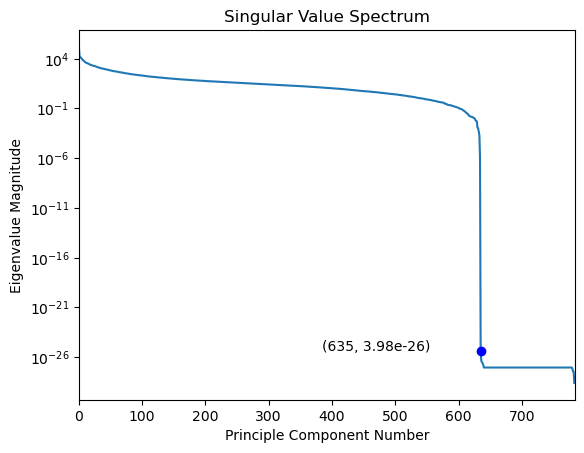

In [6]:
# get rank of random sample
r = np.linalg.matrix_rank(sample_x)
print(r)

eigval = s**2

fig = plt.figure()
plt.plot(np.arange(0, sample_x.shape[0]), eigval)
plt.xlim(0, sample_x.shape[0])
plt.xlabel("Principle Component Number")
plt.ylabel("Eigenvalue Magnitude")
plt.yscale('log')
plt.annotate('(%s, %s)' % (r, '{:.2e}'.format(eigval[r])), xy=(r-250, eigval[r]))
plt.plot(r, eigval[r], 'bo')
plt.title("Singular Value Spectrum")
plt.show()

### Problem 3

### Problem 4

In [7]:
sample_y = np.array(sample_y, dtype='i4')

In [8]:
# Projecting onto three V-modes, 0, 3, 5
# vt is V.T, and therefore each mode in vt is found by its rows. Transpose again to make them columns
proj_matrix = vt[[0, 3, 5], :].T
print(sample_x.shape, proj_matrix.shape)
proj = np.dot(sample_x, proj_matrix)
print(proj.shape)


(784, 4000) (4000, 3)
(784, 3)


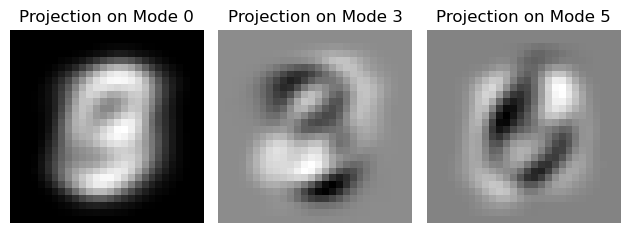

In [9]:
fig = plt.figure()
for i in range(3):
    ax = fig.add_subplot(1, 3, i+1)
    vs = [0, 3, 5]
    plt.imshow(proj[:, i].reshape(28, 28), cmap="binary")
    plt.title("Projection on Mode " + str(vs[i]))
    plt.axis('off')
plt.tight_layout()


IndexError: boolean index did not match indexed array along dimension 0; dimension is 4000 but corresponding boolean dimension is 784

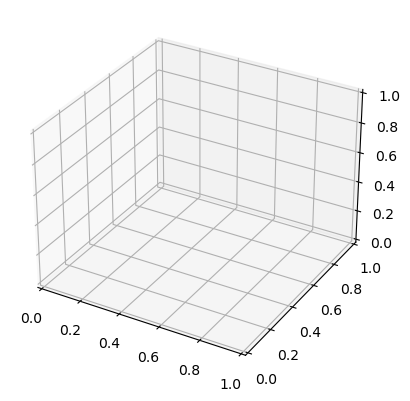

In [47]:
# Transpose projection
proj = proj.T

# Create the 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# label = 0
mask = (sample_y == 0)
ax.scatter(proj[0, :][sample_y[:784] == 0], proj[1, :][sample_y[:784] == 0], proj[2, :][sample_y[:784] == 0], c="red", label="Label: 0", s=20)
ax.scatter(proj[0, :][sample_y[:784] == 3], proj[1, :][sample_y[:784] == 3], proj[2, :][sample_y[:784] == 3], c="blue", label="Label: 3", s=20)
ax.scatter(proj[0, :][sample_y[:784] == 5], proj[1, :][sample_y[:784] == 5], proj[2, :][sample_y[:784] == 5], c="green", label="Label: 5", s=20)


# takes y, makes a boolean out of it depending on looking at current label

# Set the labels and limits of the plot
ax.set_xlabel('V0')
ax.set_ylabel('V3')
ax.set_zlabel('V5')
ax.set_box_aspect(aspect=None, zoom=0.8)

ax.legend()

plt.title("Projected V-modes")
plt.show()

## Part 2

### Problem 5

In [12]:
# for label = 0, 3
mask = np.logical_or((sample_y == 0), (sample_y == 3))
sample_x_clf = sample_x[:, mask].T
sample_y_clf = sample_y[mask]

print("Number of samples with Label = 0 or 3:\nX:", sample_x_clf.shape, "\nY:", sample_y_clf.shape)

# split train/test
X_train, X_test, y_train, y_test = train_test_split(sample_x_clf, sample_y_clf, test_size=0.2)
print("Split:", X_train.shape, X_test.shape)

Number of samples with Label = 0 or 3:
X: (791, 784) 
Y: (791,)
Split: (632, 784) (159, 784)


In [13]:
# Create a Support Vector Machine (SVM) classifier
clf = SVC(kernel="linear")

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier on the test set
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9811320754716981


[ 39  87  95 139 141 192 222 228 237 256 269 290 316 318 325 336 337 378
 379 401 409 411 420 450 500 505 512 517 546 558 572 573 589 616 622  18
  21  29  66 109 112 113 125 126 135 166 181 187 217 221 236 238 239 252
 335 367 393 433 488 521 524 544 552 591 607 609 625]
[35 32]


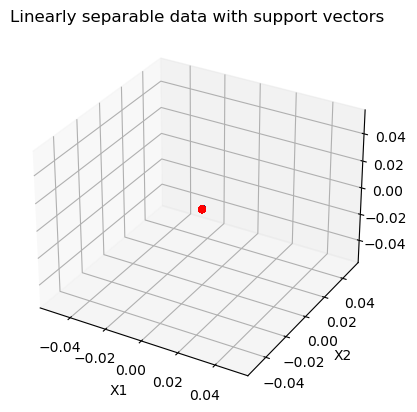

In [14]:
# Get support vector indices
support_vector_indices = clf.support_
print(support_vector_indices)

# Get number of support vectors per class
support_vectors_per_class = clf.n_support_
print(support_vectors_per_class)

# Get support vectors themselves
support_vectors = clf.support_vectors_

# Create the 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Visualize support vectors
# i dont really know what im graphing
ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 5])
ax.scatter(support_vectors[:, 0], support_vectors[:, 1], color='red')
plt.title("Linearly separable data with support vectors")
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### Problem 6

In [15]:
# for label = 1, 4, 5
mask = np.logical_or((sample_y == 1), (sample_y == 4), (sample_y == 5))
sample_x_clf = sample_x[:, mask].T
sample_y_clf = sample_y[mask]

print("Number of samples with Label = 0 or 3:\nX:", sample_x_clf.shape, "\nY:", sample_y_clf.shape)

# split train/test
X_train, X_test, y_train, y_test = train_test_split(sample_x_clf, sample_y_clf, test_size=0.2)
print("Split:", X_train.shape, X_test.shape)

Number of samples with Label = 0 or 3:
X: (848, 784) 
Y: (848,)
Split: (678, 784) (170, 784)


In [92]:
# create the linear model SGDclassifier
from sklearn.linear_model import SGDClassifier
linear_clf = SGDClassifier()

# Train the classifier using fit() function
linear_clf.fit(X_train, y_train)

# Print the learned coeficients
print ("\nFirst 10 coefficients of the linear boundary are:", linear_clf.coef_[linear_clf.coef_ != 0][:10])
print ("\nThe point of intersection of the lines are:",linear_clf.intercept_)

# Evaluate the result
y_pred = clf.predict(X_test)
# Calculate the accuracy of the classifier on the test set
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")


The coefficients of the linear boundary are: [-0.04230387 -0.32216023 -1.4578564  -1.95248625 -2.28766305 -1.33094479
 -0.30263537  0.84933152  1.53595585  0.03904972]

The point of intersection of the lines are: [74.71941162]
Accuracy: 0.9090909090909091


In [90]:
# Get support vector indices
linear_clf_indices = clf.support_
print(support_vector_indices)

# Get number of support vectors per class
support_vectors_per_class = clf.n_support_
print(support_vectors_per_class)

# Get support vectors themselves
support_vectors = clf.support_vectors_

# Create the 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Visualize support vectors
# i dont really know what im graphing
ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 5])
ax.scatter(support_vectors[:, 0], support_vectors[:, 1], color='red')
plt.title("Linearly separable data with support vectors")
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

AttributeError: 'DecisionTreeClassifier' object has no attribute 'support_'

### Problem 9: Support Vector Machines

In [18]:
# Create a Support Vector Machine (SVM) classifier
clf = SVC(kernel="linear")
worst = 100.0
best = 0.0
num1_w, num1_b, num2_w, num2_b = 0, 0, 0, 0

for i in range(10):
    for j in range(i + 1, 10):
        # for varying labels
        mask = np.logical_or((sample_y == i), (sample_y == j))
        sample_x_clf = sample_x[:, mask].T
        sample_y_clf = sample_y[mask]

        # print("Number of samples with Label:", i, "or", j, "\nX:", sample_x_clf.shape, "\nY:", sample_y_clf.shape)

        # split train/test
        X_train, X_test, y_train, y_test = train_test_split(sample_x_clf, sample_y_clf, test_size=0.2)
        # print("Split:", X_train.shape, X_test.shape)

        # Train the classifier on the training set
        clf.fit(X_train, y_train)

        # Predict the labels of the test set
        y_pred = clf.predict(X_test)

        # Calculate the accuracy of the classifier on the test set
        accuracy = accuracy_score(y_test, y_pred)
        if (min(accuracy, worst) == accuracy):
            worst = accuracy
            num1_w, num2_w = i, j
        elif (max(accuracy, best) == accuracy):
            best = accuracy
            num1_b, num2_b = i, j

print("Most difficult to separate (minimum accuracy) is at indices:", num1_w, num2_w)
print("with an accuracy of:", worst, "\n")

print("Easiest to separate (maximum accuracy) is at indices:", num1_b, num2_w)
print("with an accuracy of:", best)

Most difficult to separate (minimum accuracy) is at indices: 7 9
with an accuracy of: 0.9038461538461539 

Easiest to separate (maximum accuracy) is at indices: 6 9
with an accuracy of: 1.0


### Problem 9: Decision Tree Classifiers

In [66]:
import sklearn.tree
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)


for i in range(10):
    for j in range(i + 1, 10):
        # for varying labels
        mask = np.logical_or((sample_y == i), (sample_y == j))
        sample_x_clf = sample_x[:, mask].T
        sample_y_clf = sample_y[mask]

        # split train/test
        X_train, X_test, y_train, y_test = train_test_split(sample_x_clf, sample_y_clf, test_size=0.2)
        # print("Split:", X_train.shape, X_test.shape)

        # Train the classifier on the training set
        clf.fit(X_train, y_train)

        # Predict the labels of the test set
        y_pred = clf.predict(X_test)

        # Calculate the accuracy of the classifier on the test set
        accuracy = accuracy_score(y_test, y_pred)
        if (min(accuracy, worst) == accuracy):
            worst = accuracy
            num1_w, num2_w = i, j
        elif (max(accuracy, best) == accuracy):
            best = accuracy
            num1_b, num2_b = i, j

print("Most difficult to separate (minimum accuracy) is at indices:", num1_w, num2_w)
print("with an accuracy of:", worst, "\n")

print("Easiest to separate (maximum accuracy) is at indices:", num1_b, num2_w)
print("with an accuracy of:", best)

Most difficult to separate (minimum accuracy) is at indices: 4 7
with an accuracy of: 0.8471337579617835 

Easiest to separate (maximum accuracy) is at indices: 0 7
with an accuracy of: 1.0


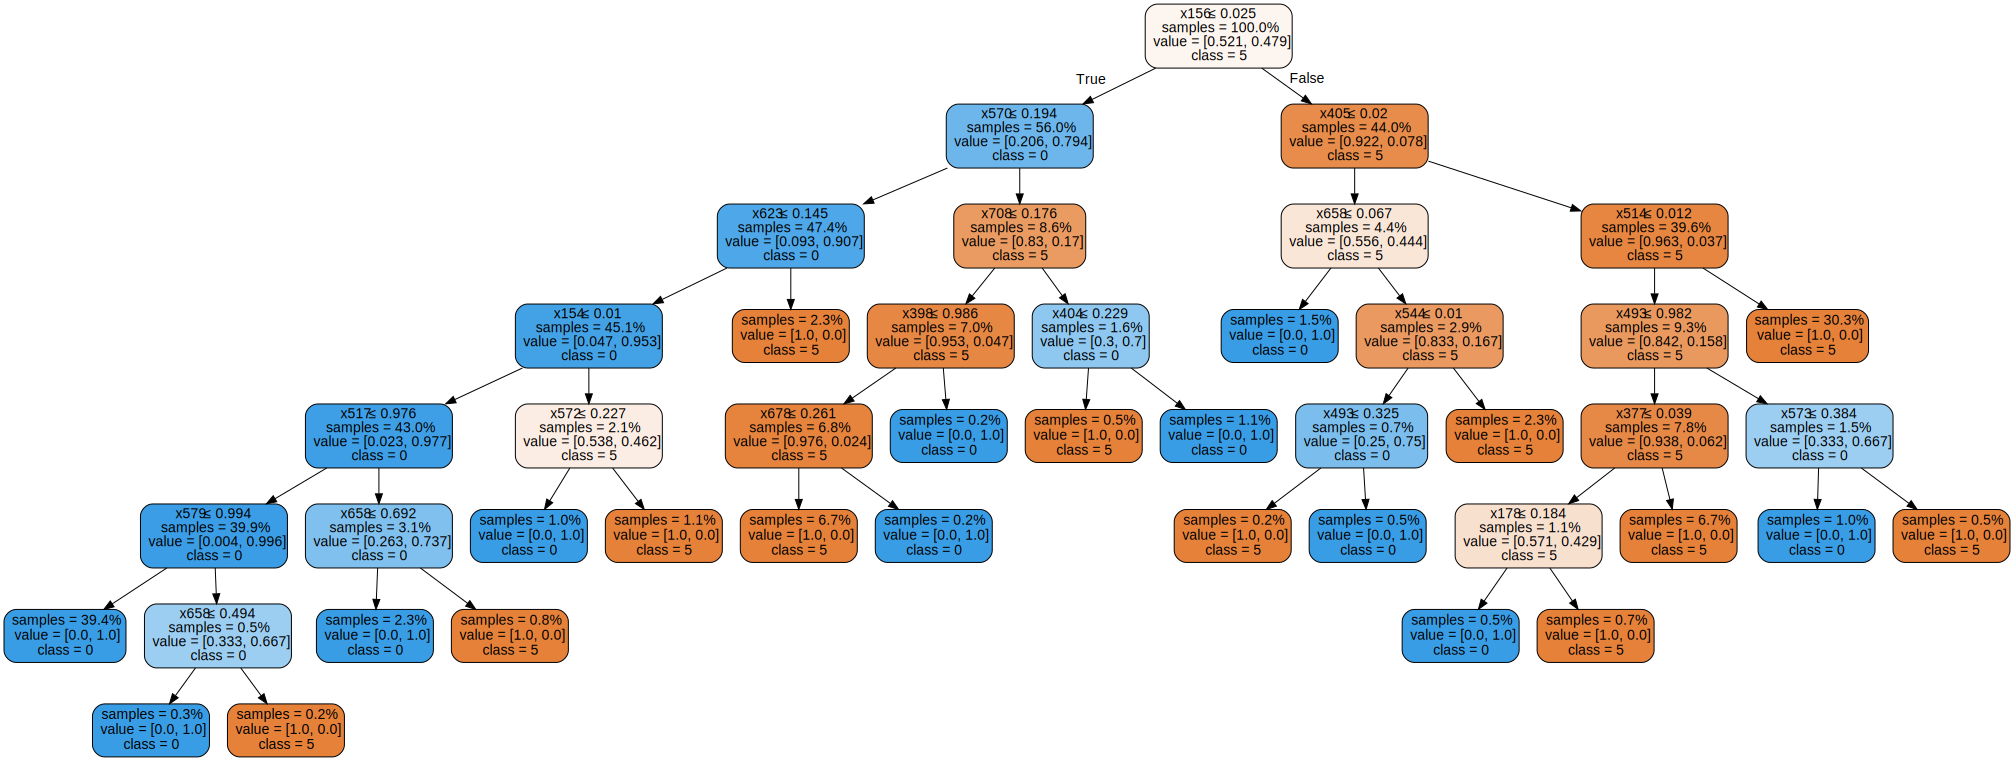

In [81]:
import graphviz

# Plot the tree structure using Graphviz
dot_data = sklearn.tree.export_graphviz(clf, out_file="tree_1.dot", class_names=mnist.target,
                                        impurity=False, proportion = True, filled=True, rounded=True, special_characters=True)

with open("tree_1.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)